# **Tugas 9 - Klasifikasi Berita pada Data yang sudah di Reduksi**

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/nittyaa99/ppw

## Install Library

In [1]:
!pip install Sastrawi pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


## Import Library

In [21]:
import pandas as pd
import re
import pickle
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from tqdm import tqdm
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Data

In [3]:
data = pd.read_csv('crawl_berita.csv')
data

,Judul,Isi,Tanggal,Kategori
0,Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...,Wakil Menteri Keuangan II Thomas Djiwandono me...,"Rabu, 11 Sep 2024 18:10 WIB",Ekonomi
1,Pebisnis Minta Jokowi Cabut Larangan Jual Roko...,Gabungan pengusaha rokok dan petani tembakau m...,"Rabu, 11 Sep 2024 17:31 WIB",Ekonomi
2,IHSG Melemah Tipis ke 7.760 Sore Ini,Indeks Harga Saham Gabungan (IHSG) ditutup di ...,"Rabu, 11 Sep 2024 16:37 WIB",Ekonomi
3,Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...,Nilai tukar rupiah berada di level Rp15.402 pe...,"Rabu, 11 Sep 2024 16:24 WIB",Ekonomi
4,Sri Mulyani Usai Nonton Timnas-Australia: Teri...,Menteri Keuangan Sri MulyaniÂ berkomentar soal...,"Rabu, 11 Sep 2024 15:47 WIB",Ekonomi
...,...,...,...,...
95,Hasil Liga 1: PSM vs Persib Sama Kuat,PSM Makassar harus puas berbagi satu angka usa...,"Rabu, 11 Sep 2024 17:25 WIB",Olahraga
96,"Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med...",Presiden Joko Widodo (Jokowi) menyerahkan bonu...,"Rabu, 11 Sep 2024 17:13 WIB",Olahraga
97,Megawati Ungkap Target di Liga Korea: Jadi Pem...,Megawati Hangestri Pertiwi mengungkapkan targe...,"Rabu, 11 Sep 2024 16:49 WIB",Olahraga
98,Media Vietnam: Indonesia Buat Kejutan Besar La...,Media Vietnam memuji performa Timnas Indonesia...,"Rabu, 11 Sep 2024 16:24 WIB",Olahraga


## Pengacakan Urutan Data

In [4]:
df_acak = data.sample(frac=1).reset_index(drop=True)
df_acak

,Judul,Isi,Tanggal,Kategori
0,Kisah Inspiratif Wanita AgenBRILink dalam Mend...,AgenBRILink merupakan perluasan layanan perban...,"Rabu, 11 Sep 2024 14:07 WIB",Ekonomi
1,Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...,Wakil Menteri Keuangan II Thomas Djiwandono me...,"Rabu, 11 Sep 2024 18:10 WIB",Ekonomi
2,"Harga Minyak Mentah Bangkit, Diterbangkan Bada...",Harga minyak mentah melambung pada perdagangan...,"Rabu, 11 Sep 2024 11:40 WIB",Ekonomi
3,"Media Australia: Indonesia, Raksasa Tidur yang...",Media Australia memberikan pujian atas penampi...,"Rabu, 11 Sep 2024 13:02 WIB",Olahraga
4,Megawati Ungkap Target di Liga Korea: Jadi Pem...,Megawati Hangestri Pertiwi mengungkapkan targe...,"Rabu, 11 Sep 2024 16:49 WIB",Olahraga
...,...,...,...,...
95,Basuki Terbang ke IKN Cek Kesiapan Jelang Joko...,Menteri Pekerjaan Umum dan Perumahan Rakyat (P...,"Rabu, 11 Sep 2024 12:03 WIB",Ekonomi
96,Respons PSSI soal 'Penonton Siluman' di Indone...,Anggota Komite Eksekutif (Exco) PSSI Arya Sinu...,"Rabu, 11 Sep 2024 16:02 WIB",Olahraga
97,Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...,Nilai tukar rupiah berada di level Rp15.402 pe...,"Rabu, 11 Sep 2024 16:24 WIB",Ekonomi
98,Netizen Australia Kecewa Berat setelah Ditahan...,Jika suporter Indonesia begitu gegap gempita m...,"Rabu, 11 Sep 2024 14:44 WIB",Olahraga


## Menggabungkan Judul dan Isi
Tujuannya adalah membantu memberikan hasil yang lebih relevan saat pengguna mencari dokumen berdasarkan keyword

In [5]:
titles = data['Judul']
contents = data['Isi']

data['Isi'] = titles + " " + contents

data['Isi']

,Isi
0,Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...
1,Pebisnis Minta Jokowi Cabut Larangan Jual Roko...
2,IHSG Melemah Tipis ke 7.760 Sore Ini Indeks Ha...
3,Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...
4,Sri Mulyani Usai Nonton Timnas-Australia: Teri...
...,...
95,Hasil Liga 1: PSM vs Persib Sama Kuat PSM Maka...
96,"Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med..."
97,Megawati Ungkap Target di Liga Korea: Jadi Pem...
98,Media Vietnam: Indonesia Buat Kejutan Besar La...


## Pembagian Data Training dan Data Testing Sebelum Preprocessing

In [6]:
X = data['Isi']
y = data['Kategori']

# split data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData training (X_train):")
print(X_train.head())

print("\nLabel training (y_train):")
print(y_train.head())

print("\nData testing (X_test):")
print(X_test.head())

print("\nLabel testing (y_test):")
print(y_test.head())


Data training (X_train):
55    Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med...
88    Media Australia: Indonesia, Raksasa Tidur yang...
26    Sri Mulyani Usai Nonton Timnas-Australia: Teri...
42    Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...
69    Alasan STY Mainkan Wahyu 'Hulk' Ketimbang Asna...
Name: Isi, dtype: object

Label training (y_train):
55    Olahraga
88    Olahraga
26     Ekonomi
42     Ekonomi
69    Olahraga
Name: Kategori, dtype: object

Data testing (X_test):
83    Link Live Streaming PSM Makassar vs Persib Ban...
53    Hasil Liga 1: Bali United vs Arema Tanpa Pemen...
70    Berapa Poin Aman Timnas Indonesia untuk Lolos ...
45    Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...
44    IHSG Melemah Tipis ke 7.760 Sore Ini Indeks Ha...
Name: Isi, dtype: object

Label testing (y_test):
83    Olahraga
53    Olahraga
70    Olahraga
45     Ekonomi
44     Ekonomi
Name: Kategori, dtype: object


## Mengonversi Semua Huruf Besar Menjadi Huruf Kecil

In [7]:
def clean_lower(text):
    if isinstance(text, str):
        return text.lower()
    return text

X_train = X_train.apply(clean_lower)
X_test = X_test.apply(clean_lower)

print("Data training setelah diubah menjadi huruf kecil:")
print(X_train.head())

print("\nData testing setelah diubah menjadi huruf kecil:")
print(X_test.head())

Data training setelah diubah menjadi huruf kecil:
55    jokowi beri bonus rp36,25 miliar ke peraih med...
88    media australia: indonesia, raksasa tidur yang...
26    sri mulyani usai nonton timnas-australia: teri...
42    pertemuan sri mulyani-prabowo tak banyak bahas...
69    alasan sty mainkan wahyu 'hulk' ketimbang asna...
Name: Isi, dtype: object

Data testing setelah diubah menjadi huruf kecil:
83    link live streaming psm makassar vs persib ban...
53    hasil liga 1: bali united vs arema tanpa pemen...
70    berapa poin aman timnas indonesia untuk lolos ...
45    rupiah menguat rp15.402 per dolar as usai deba...
44    ihsg melemah tipis ke 7.760 sore ini indeks ha...
Name: Isi, dtype: object


## Menghapus Simbol dan Angka dari Teks

In [8]:
def clean_punct(text):
    if isinstance(text, str):
        clean_patterns = re.compile(r'[0-9]|[/(){}\[\]\|@,;_]|[^a-z ]')
        text = clean_patterns.sub(' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return text

X_train = X_train.apply(clean_punct)
X_test = X_test.apply(clean_punct)

print("Data training setelah dibersihkan:")
print(X_train.head())

print("\nData testing setelah dibersihkan:")
print(X_test.head())

Data training setelah dibersihkan:
55    jokowi beri bonus rp miliar ke peraih medali p...
88    media australia indonesia raksasa tidur yang m...
26    sri mulyani usai nonton timnas australia terim...
42    pertemuan sri mulyani prabowo tak banyak bahas...
69    alasan sty mainkan wahyu hulk ketimbang asnawi...
Name: Isi, dtype: object

Data testing setelah dibersihkan:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bali united vs arema tanpa pemenang...
70    berapa poin aman timnas indonesia untuk lolos ...
45    rupiah menguat rp per dolar as usai debat trum...
44    ihsg melemah tipis ke sore ini indeks harga sa...
Name: Isi, dtype: object


## Menghapus Spasi Awal dan Akhir dari Sebuah String

In [9]:
def _normalize_whitespace(text):
    if isinstance(text, str):
        corrected = re.sub(r'\s+', ' ', text)
        return corrected.strip()
    return text

X_train = X_train.apply(_normalize_whitespace)
X_test = X_test.apply(_normalize_whitespace)

print("Data training setelah normalisasi spasi:")
print(X_train.head())

print("\nData testing setelah normalisasi spasi:")
print(X_test.head())

Data training setelah normalisasi spasi:
55    jokowi beri bonus rp miliar ke peraih medali p...
88    media australia indonesia raksasa tidur yang m...
26    sri mulyani usai nonton timnas australia terim...
42    pertemuan sri mulyani prabowo tak banyak bahas...
69    alasan sty mainkan wahyu hulk ketimbang asnawi...
Name: Isi, dtype: object

Data testing setelah normalisasi spasi:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bali united vs arema tanpa pemenang...
70    berapa poin aman timnas indonesia untuk lolos ...
45    rupiah menguat rp per dolar as usai debat trum...
44    ihsg melemah tipis ke sore ini indeks harga sa...
Name: Isi, dtype: object


## Mengurangi Jumlah Kata dalam Sebuah Dokumen

In [10]:
def clean_stopwords(text):
    if isinstance(text, str):
        stopword = set(stopwords.words('indonesian'))
        text = ' '.join(word for word in text.split() if word not in stopword)
        return text.strip()
    return text

X_train = X_train.apply(clean_stopwords)
X_test = X_test.apply(clean_stopwords)

print("Data training setelah menghapus stopwords:")
print(X_train.head())

print("\nData testing setelah menghapus stopwords:")
print(X_test.head())

Data training setelah menghapus stopwords:
55    jokowi bonus rp miliar peraih medali paralimpi...
88    media australia indonesia raksasa tidur bangki...
26    sri mulyani nonton timnas australia terima kas...
42    pertemuan sri mulyani prabowo bahas makan berg...
69    alasan sty mainkan wahyu hulk ketimbang asnawi...
Name: Isi, dtype: object

Data testing setelah menghapus stopwords:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bali united vs arema pemenang bali ...
70    poin aman timnas indonesia lolos piala dunia t...
45    rupiah menguat rp dolar as debat trump harris ...
44    ihsg melemah tipis sore indeks harga saham gab...
Name: Isi, dtype: object


## Mereduksi Kata Menjadi Bentuk Dasar

In [11]:
def sastrawistemmer(text):
    factory = StemmerFactory()
    st = factory.create_stemmer()
    text = ' '.join(st.stem(word) for word in text.split())
    return text

X_train = X_train.apply(sastrawistemmer)
X_test = X_test.apply(sastrawistemmer)

print("Data training setelah stemming:")
print(X_train.head())

print("\nData testing setelah stemming:")
print(X_test.head())

Data training setelah stemming:
55    jokowi bonus rp miliar raih medali paralimpiad...
88    media australia indonesia raksasa tidur bangki...
26    sri mulyani nonton timnas australia terima kas...
42    temu sri mulyani prabowo bahas makan gizi grat...
69    alas sty main wahyu hulk ketimbang asnawi lawa...
Name: Isi, dtype: object

Data testing setelah stemming:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bal united vs arema menang bal unit...
70    poin aman timnas indonesia lolos piala dunia t...
45    rupiah kuat rp dolar as debat trump harris nil...
44    ihsg lemah tipis sore indeks harga saham gabun...
Name: Isi, dtype: object


## Menampilkan Data Training

In [12]:
train_df = pd.DataFrame({'Content': X_train, 'Cattegory': y_train})
test_df = pd.DataFrame({'Content': X_test, 'Cattegory': y_test})

train_df

,Content,Cattegory
55,jokowi bonus rp miliar raih medali paralimpiad...,Olahraga
88,media australia indonesia raksasa tidur bangki...,Olahraga
26,sri mulyani nonton timnas australia terima kas...,Ekonomi
42,temu sri mulyani prabowo bahas makan gizi grat...,Ekonomi
69,alas sty main wahyu hulk ketimbang asnawi lawa...,Olahraga
...,...,...
60,kevin sanjaya sukamuljo masuk hall of fame pb ...,Olahraga
71,menpora tanggap calo tiket laga timnas indones...,Olahraga
14,zulhas legal ekspor kratom menteri dagang zulk...,Ekonomi
92,media vietnam indonesia tim kuat asean bikin t...,Olahraga


## Menampilkan Data Testing

In [13]:
test_df

,Content,Cattegory
83,link live streaming psm makassar vs persib ban...,Olahraga
53,hasil liga bal united vs arema menang bal unit...,Olahraga
70,poin aman timnas indonesia lolos piala dunia t...,Olahraga
45,rupiah kuat rp dolar as debat trump harris nil...,Ekonomi
44,ihsg lemah tipis sore indeks harga saham gabun...,Ekonomi
39,harga minyak mentah bangkit terbang badai trop...,Ekonomi
22,temu sri mulyani prabowo bahas makan gizi grat...,Ekonomi
80,kevin sanjaya sukamuljo masuk hall of fame pb ...,Olahraga
10,tawar menteri uang temu sri mulyani prabowo wa...,Ekonomi
0,temu sri mulyani prabowo bahas makan gizi grat...,Ekonomi


## Menghitung Matriks TF-IDF
Ukuran matriks yang dihasilkan akan memberikan wawasan tentang jumlah dokumen yang diproses dan kompleksitas teks berdasarkan jumlah kata yang terlibat

In [14]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Menampilkan data Training yang sudah di TF-IDF

In [15]:
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,abroad,absolut,acara,achmad,adab,adam,adaptif,adb,adi,adilson,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.039618,0.0,0.0,0.079236,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.054173,0.0,0.0,0.0,0.054173,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.033719,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
76,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
77,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.056421,0.028211
78,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


## Menampilkan Data Testing yang sudah di TF-IDF

In [16]:
tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,abroad,absolut,acara,achmad,adab,adam,adaptif,adb,adi,adilson,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.049514,0.0,0.000000,0.0,0.0,0.049514,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.049338,0.000000,0.0,0.0,0.000000,0.079214,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.043470,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.033719,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


## Reduksi Dimensi Data Teks Menggunakan SVD
Tujuannya adalah dapat mengurangi dimensi data yang besar menjadi dimensi yang lebih kecil tanpa kehilangan banyak informasi

In [17]:
n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_lsa = svd.fit_transform(X_train_tfidf)

X_test_lsa = svd.transform(X_test_tfidf)

train_lsa_df = pd.DataFrame(X_train_lsa)
train_lsa_df.insert(0, 'Cattegory', y_train.values)

test_lsa_df = pd.DataFrame(X_test_lsa)
test_lsa_df.insert(0, 'Cattegory', y_test.values)

## Menampilkan Data Training yang sudah di Reduksi Dimensi

In [18]:
train_lsa_df

,Cattegory,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
0,Olahraga,0.101157,0.056876,0.089987,-0.053045,0.070200,-0.034141,0.017803,-0.034805,0.264487,...,-1.399298e-17,-1.029992e-17,4.418124e-18,8.131516e-19,-1.633080e-17,2.406929e-17,-3.361027e-18,-1.073360e-17,-1.748276e-17,3.881444e-17
1,Olahraga,0.668684,-0.071076,-0.101334,-0.069158,0.039603,-0.021853,-0.039980,0.150300,0.017163,...,2.385245e-17,-9.459664e-18,1.691355e-17,9.866240e-18,-4.499439e-18,1.881091e-17,-1.696776e-17,2.168404e-18,1.623593e-17,6.743738e-17
2,Ekonomi,0.553790,0.039453,0.034004,0.043818,0.010138,-0.075460,-0.073812,0.340483,0.026538,...,2.894163e-17,1.707618e-17,1.414884e-17,-2.158918e-17,1.409463e-18,5.095750e-18,-3.659182e-18,-7.684283e-18,-1.157386e-17,4.228388e-17
3,Ekonomi,0.062312,0.464816,-0.081233,0.080218,0.045095,0.022819,-0.017570,0.008741,0.013362,...,-3.469447e-18,-3.252607e-19,-1.734723e-18,6.938894e-18,1.734723e-18,-5.204170e-18,-2.385245e-18,4.336809e-19,-5.637851e-18,1.058181e-16
4,Olahraga,0.409393,-0.029101,-0.018774,0.011310,-0.044808,0.011211,0.021759,0.135724,-0.001097,...,-6.369688e-18,-2.005774e-18,5.041540e-18,-1.539567e-17,-8.944668e-18,-1.875670e-17,1.615461e-17,1.029992e-17,-4.228388e-18,1.290201e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Olahraga,0.045031,0.016989,0.091082,0.014583,0.046296,-0.000367,-0.011800,-0.040294,-0.049298,...,8.538092e-18,-6.847414e-18,-4.363914e-18,1.268517e-17,8.239937e-18,1.659507e-17,-2.432679e-18,-6.993104e-18,1.149254e-17,-1.650698e-17
76,Olahraga,0.301345,-0.000587,0.174196,-0.184108,0.572917,-0.083689,-0.144164,-0.248891,0.490916,...,-1.973248e-17,6.938894e-18,-4.445229e-18,-1.387779e-17,-1.013729e-17,4.011548e-18,-7.589415e-19,1.279359e-17,-5.204170e-18,1.282340e-16
77,Ekonomi,0.037634,0.084819,0.063151,-0.096198,0.018080,-0.010598,0.246460,0.048656,0.017675,...,7.575863e-18,1.795710e-18,-4.512992e-18,8.734604e-18,4.883992e-18,3.930233e-18,2.998920e-18,-6.454391e-18,3.374579e-18,-1.740174e-16
78,Olahraga,0.679646,-0.077120,-0.287866,-0.036615,-0.248739,0.090749,0.102935,-0.392538,-0.020934,...,4.770490e-18,-2.706440e-17,-1.517883e-18,-3.252607e-18,-3.740497e-18,1.576328e-17,-1.257675e-17,3.843497e-17,2.749808e-17,1.156844e-16


## Mwnampilkan Data Testing yang sudah di Reduksi Dimensi

In [19]:
test_lsa_df

,Cattegory,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,78,79
0,Olahraga,0.177392,0.019224,0.373771,0.351811,-0.120977,-0.040169,0.060216,-0.094913,0.106656,...,1.084202e-17,-1.263096e-17,-1.437923e-17,5.664956e-18,-6.654291e-18,-8.538092e-18,1.878380e-17,-3.306817e-18,1.864828e-17,-1.950615e-16
1,Olahraga,0.204569,0.010784,0.370901,0.310707,-0.065326,0.013760,0.002573,-0.037315,-0.290904,...,-4.391019e-18,2.897530e-17,1.889222e-17,-3.559571e-17,-2.907017e-18,3.537210e-17,-1.956985e-17,6.620410e-18,-5.971243e-17,2.671203e-16
2,Olahraga,0.399556,-0.040107,-0.000911,0.003854,0.015653,-0.007423,-0.021909,0.092830,0.002456,...,-3.875743e-02,1.854997e-02,-5.199530e-02,1.011197e-02,-3.310664e-02,-1.629340e-02,1.159449e-02,3.249167e-02,-2.764822e-02,-1.944829e-02
3,Ekonomi,0.089032,0.078286,0.001238,-0.049865,-0.097731,0.107150,0.094653,-0.198365,0.306831,...,6.396793e-18,1.301043e-18,7.589415e-19,-1.734723e-18,-1.637145e-17,3.577867e-18,-2.103352e-17,1.225148e-17,-3.144186e-18,-1.209970e-16
4,Ekonomi,0.045717,0.058673,0.023227,-0.042939,-0.067567,0.073299,0.076553,-0.127479,0.290751,...,-6.559423e-18,-4.336809e-18,1.138412e-18,-6.396793e-18,1.111307e-17,-1.192622e-17,-2.038469e-17,4.174178e-18,1.734723e-18,-2.461139e-17
5,Ekonomi,0.038662,0.039907,0.018408,-0.028258,-0.009657,0.024931,0.038132,-0.015153,0.074207,...,-1.140445e-17,-6.938894e-18,1.938011e-18,2.680012e-18,-2.005774e-18,-1.816039e-17,2.466560e-18,1.013898e-17,1.230569e-17,1.510158e-16
6,Ekonomi,0.062312,0.464816,-0.081233,0.080218,0.045095,0.022819,-0.017570,0.008741,0.013362,...,-1.897354e-18,8.944668e-19,-2.588533e-18,-2.553296e-17,-3.455894e-19,-9.161508e-18,-3.577867e-18,-2.927346e-18,-2.439455e-19,1.141394e-16
7,Olahraga,0.045031,0.016989,0.091082,0.014583,0.046296,-0.000367,-0.011800,-0.040294,-0.049298,...,7.365799e-18,-7.101524e-18,-4.038653e-18,1.161452e-17,7.046540e-18,1.413529e-17,-1.572093e-18,-6.871131e-18,3.272935e-18,-1.166195e-17
8,Ekonomi,0.097010,0.766298,-0.198557,0.219419,0.094430,0.050566,-0.082735,-0.006436,-0.034311,...,-2.493665e-18,1.829591e-17,-9.432559e-18,-2.732189e-17,-6.132519e-18,-1.664250e-17,-1.176359e-17,-2.059984e-18,-3.794708e-18,2.030169e-17
9,Ekonomi,0.062312,0.464816,-0.081233,0.080218,0.045095,0.022819,-0.017570,0.008741,0.013362,...,-1.897354e-18,8.944668e-19,-2.588533e-18,-2.553296e-17,-3.455894e-19,-9.161508e-18,-3.577867e-18,-2.927346e-18,-2.439455e-19,1.141394e-16


## Evaluasi Model Logistic Regression dengan Nilai Aktual dan Prediksi

In [22]:
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_lsa, y_train_encoded)

y_pred = lr_model.predict(X_test_lsa)

df = pd.DataFrame({'Actual value': y_test_encoded, 'Predicted value': y_pred})
df

,Actual value,Predicted value
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


## Visualisasi Confusion Matrix

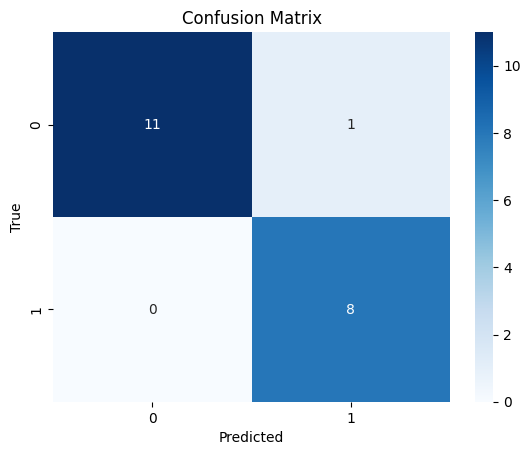

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



In [23]:
matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test_encoded, y_pred))

## Menyimpan Model

In [24]:
# 1. Menyimpan TF-IDF Vectorizer
with open('tfidf_vectorizer2.sav', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# 2. Menyimpan SVD Model (TruncatedSVD)
with open('svd_model2.sav', 'wb') as f:
    pickle.dump(svd, f)

# 3. Menyimpan Logistic Regression Model
with open('lr_model2.sav', 'wb') as f:
    pickle.dump(lr_model, f)